<a href="https://colab.research.google.com/github/raulbenitez/tortuosity/blob/master/EXPLORATORY/Tortuosity_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O Tortuosity_data_analysys_6_attributes.csv https://raw.githubusercontent.com/raulbenitez/tortuosity/master/EXPLORATORY/Tortuosity_data_analysys_6_attributes.csv

--2020-05-15 13:44:37--  https://raw.githubusercontent.com/raulbenitez/tortuosity/master/EXPLORATORY/Tortuosity_data_analysys_6_attributes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23895 (23K) [text/plain]
Saving to: ‘Tortuosity_data_analysys_6_attributes.csv’

Tortuosity_data_ana 100%[===================>]  23.33K  --.-KB/s    in 0.007s  

2020-05-15 13:44:37 (3.39 MB/s) - ‘Tortuosity_data_analysys_6_attributes.csv’ saved [23895/23895]



In [8]:
import pandas as pd
d = pd.read_csv('/content/Tortuosity_data_analysys_6_attributes.csv',sep=',',index_col=0)
d.head(20)

,Aorta-l,Aorta_t2,R-Iliac-l,R-Iliac_t2,L-Iliac-l,L_Iliac_t2
1,94.15,2.53,63.40,6.30,60.21,5.18
2,79.80,2.30,60.90,4.94,60.45,5.33
3,100.50,4.36,63.67,6.45,28.10,2.13
4,100.52,4.11,61.13,5.74,60.03,5.05
5,100.23,4.37,33.76,2.40,NaN,NaN
6,100.28,5.92,64.18,5.20,60.10,6.44
7,100.17,4.35,61.81,4.30,37.70,3.02
8,89.53,3.30,64.01,5.72,60.57,7.91
9,100.80,5.10,60.00,4.86,60.28,8.72
10,99.90,2.82,61.58,5.93,60.52,5.96


Multivariate data imputation:

In [9]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_data = imputer.fit_transform(d)

d_imputed = pd.DataFrame(imputed_data,columns=d.columns)
d_imputed.head(20)

,Aorta-l,Aorta_t2,R-Iliac-l,R-Iliac_t2,L-Iliac-l,L_Iliac_t2
0,94.15,2.530,63.400,6.300,60.210,5.180
1,79.80,2.300,60.900,4.940,60.450,5.330
2,100.50,4.360,63.670,6.450,28.100,2.130
3,100.52,4.110,61.130,5.740,60.030,5.050
4,100.23,4.370,33.760,2.400,60.875,4.565
5,100.28,5.920,64.180,5.200,60.100,6.440
6,100.17,4.350,61.810,4.300,37.700,3.020
7,89.53,3.300,64.010,5.720,60.570,7.910
8,100.80,5.100,60.000,4.860,60.280,8.720
9,99.90,2.820,61.580,5.930,60.520,5.960


Primer fem un resum estadístic de les variables:

In [20]:
d_imputed.describe()

,Aorta-l,Aorta_t2,R-Iliac-l,R-Iliac_t2,L-Iliac-l,L_Iliac_t2
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,96.658569,5.046233,61.250540,6.523508,58.087808,6.407177
std,11.912923,3.228205,7.739913,3.056829,8.108704,3.053928
min,5.520000,0.180000,22.370000,1.260000,6.040000,0.400000
25%,100.070000,3.110000,60.430000,4.670000,60.100000,4.570000
50%,100.350000,4.230000,62.430000,5.750000,60.400000,5.480000
75%,100.590000,6.090000,64.660000,7.310000,60.680000,7.365000
max,114.150000,33.020000,80.230000,24.600000,100.670000,25.440000


En mitja, la longitut de la aorta és de 96, la de la ilíaca dreta 61 i la de l'esquerra 58. Les tortuositats sembla que prenen valors similars (entorn a 5-6) i presenten un grau similar de variabilitat (al voltant de 3). Tot plegat sembla raonable.

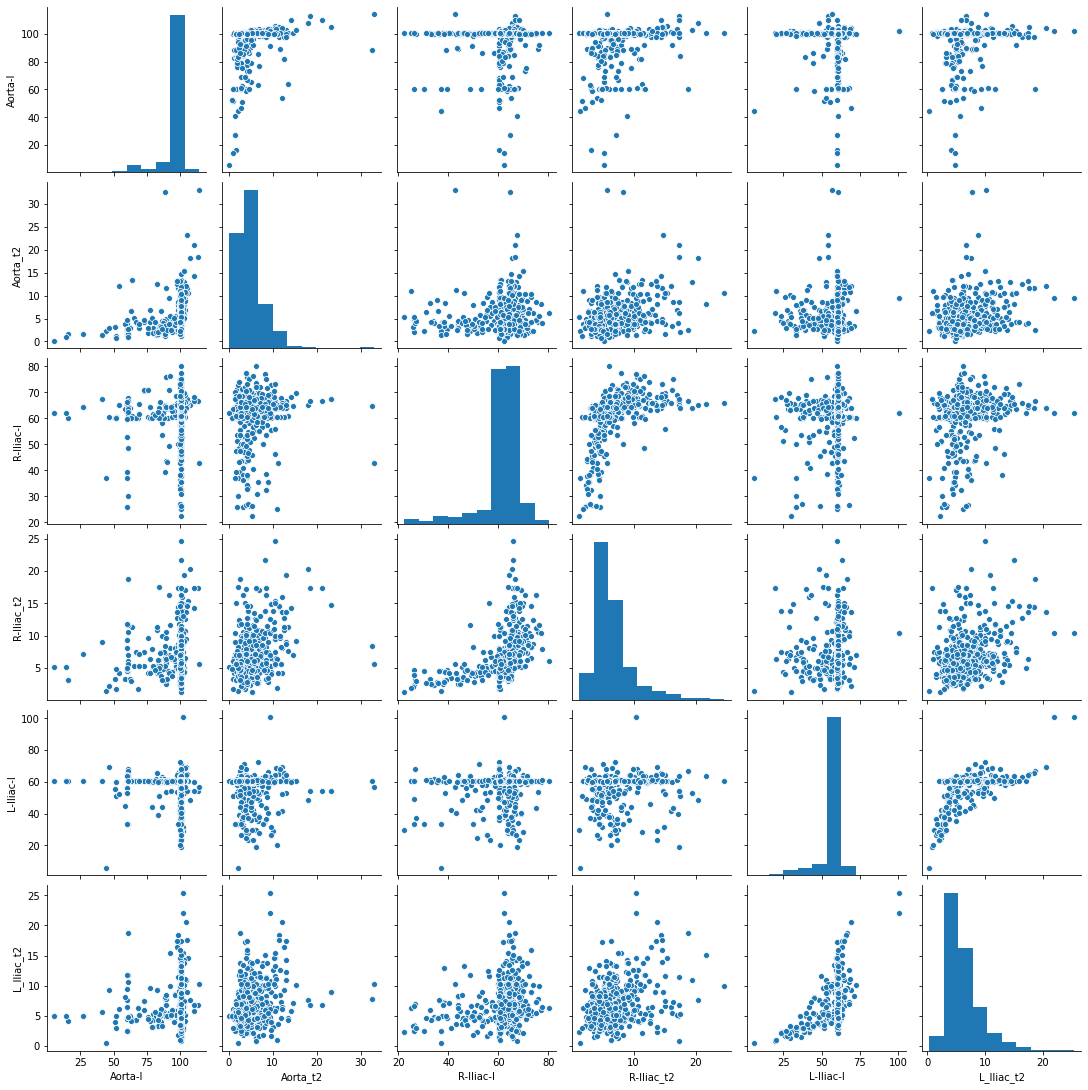

In [21]:
import seaborn as sns 
sns.pairplot(d_imputed)

No sembla que poguem identificar clarament dos grups d'observacions que correspongin a casos normal i anòmal. 

Representem només les tres variables de tortuositat:

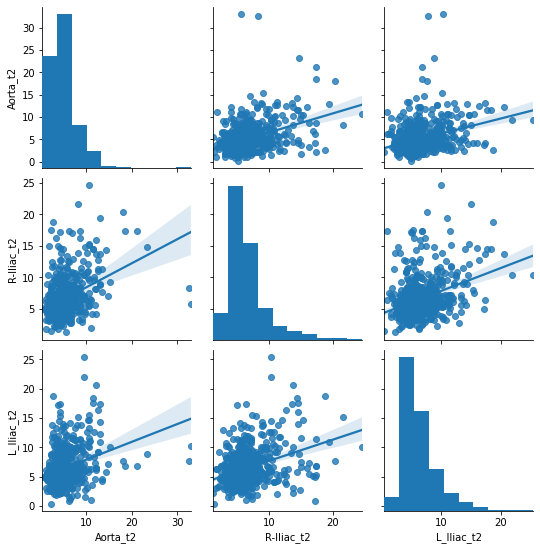

In [22]:
import seaborn as sns 
sns.pairplot(d_imputed,vars=['Aorta_t2','R-Iliac_t2','L_Iliac_t2'],kind="reg")


Sembla que si que hi ha una lleugera correlació entre la tortuositat dels tres segments, però tamboc massa important. Em pregunto si la mesura de tortuositat finalment depen de la longitut del segment. També si els valors de la tortuositat en els tres segments prenen valors en una mateixa escala i per tant 
permeten ser comparats. 


Podem fer el mateix amb les longituds dels segments:

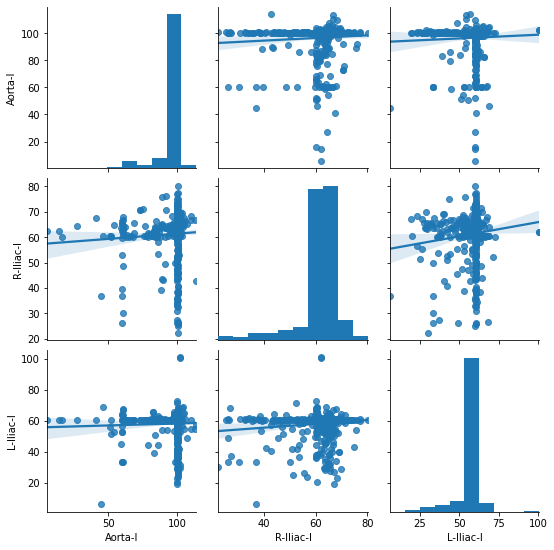

In [18]:
import seaborn as sns 
sns.pairplot(d_imputed,vars=['Aorta-l','R-Iliac-l','L-Iliac-l'],kind="reg")

Em sorprén que la gran majoria d'ahortes que fan una mesura de 100 